In [265]:
!pip install scikit-learn
!pip install pandas
!pip install seaborn


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [266]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression

In [270]:
df=pd.read_csv('d.csv')
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [272]:
df.duplicated().sum()

np.int64(0)

In [273]:
df.describe()  

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000,440832.000000
mean,225398.667955,39.373153,31.256336,15.807494,3.604437,12.965722,631.616223,14.480868,0.567107
std,129531.918550,12.442369,17.255727,8.586242,3.070218,8.258063,240.803001,8.596208,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113621.750000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226125.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.250000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


In [274]:
df.isna().sum()

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [278]:
df.columns


Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction', 'Churn'],
      dtype='object')

(array([45058., 47789., 52063., 43912., 57897., 61853., 50606., 27229.,
        27214., 27211.]),
 array([18. , 22.7, 27.4, 32.1, 36.8, 41.5, 46.2, 50.9, 55.6, 60.3, 65. ]),
 <BarContainer object of 10 artists>)

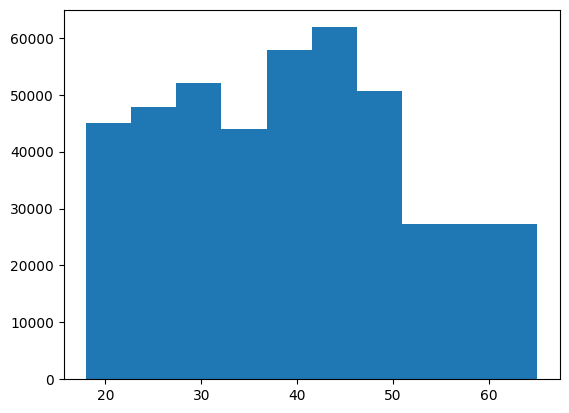

In [279]:
plt.hist(x=df['Age'],bins=10,linewidth=0.8)

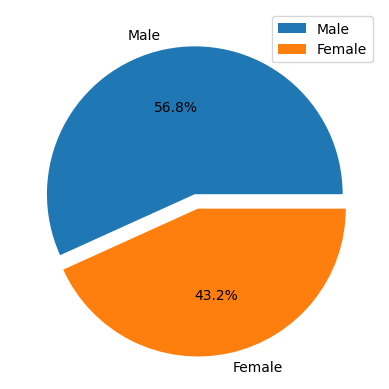

In [282]:
plt.pie(x=df['Gender'].value_counts().values,labels=df['Gender'].value_counts().index,autopct='%1.1f%%',explode=[0,0.1])
plt.legend()
plt.show()

<Axes: xlabel='Tenure', ylabel='Density'>

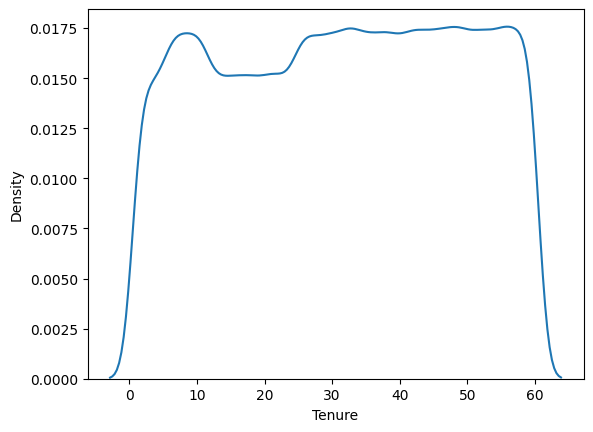

In [283]:
sns.kdeplot(data=df,x='Tenure')

<Axes: xlabel='Subscription Type', ylabel='count'>

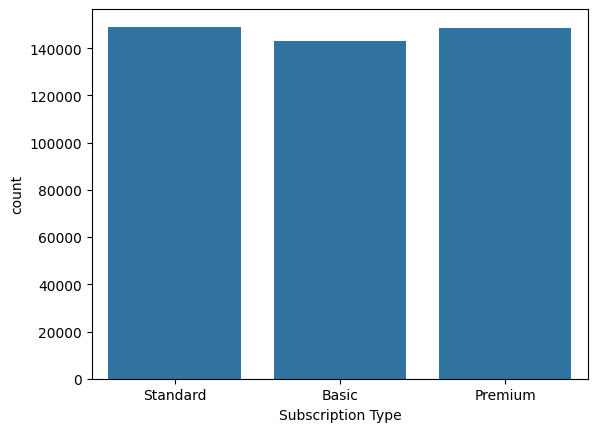

In [284]:
sns.countplot(x='Subscription Type',data=df)

In [285]:
df.groupby('Subscription Type')['Contract Length'].value_counts()

Subscription Type  Contract Length
Basic              Annual             57355
                   Quarterly          56621
                   Monthly            29050
Premium            Annual             59828
                   Quarterly          59781
                   Monthly            29069
Standard           Quarterly          60128
                   Annual             60015
                   Monthly            28985
Name: count, dtype: int64

In [286]:

print(df.groupby('Subscription Type')['Payment Delay'].mean())

Subscription Type
Basic       13.026310
Premium     12.916766
Standard    12.956420
Name: Payment Delay, dtype: float64


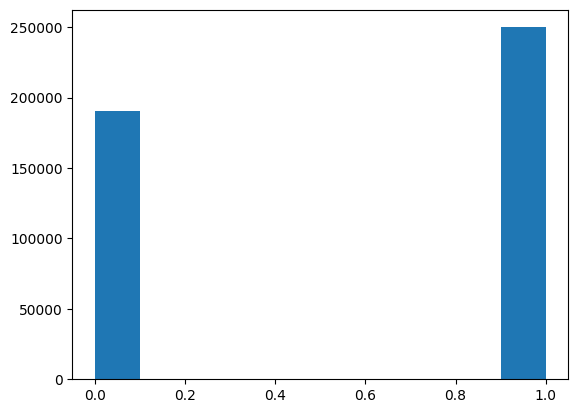

In [287]:
plt.hist(x=df['Churn'])
plt.show()

In [290]:
le1 = LabelEncoder()
df['Gender'] = le1.fit_transform(df['Gender'])
df['Contract Length'] = le1.fit_transform(df['Contract Length'])
df['Subscription Type'] = le1.fit_transform(df['Subscription Type'])
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0,1.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0,1.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0,1.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0,1.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0,0.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0,0.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0,0.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0,0.0


In [291]:
x=df.drop('Churn',axis=1)
y=df['Churn']
x

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.00,17.0
1,65.0,0,49.0,1.0,10.0,8.0,0,1,557.00,6.0
2,55.0,0,14.0,4.0,6.0,18.0,0,2,185.00,3.0
3,58.0,1,38.0,21.0,7.0,7.0,2,1,396.00,29.0
4,23.0,1,32.0,20.0,5.0,8.0,0,1,617.00,20.0
...,...,...,...,...,...,...,...,...,...,...
440828,42.0,1,54.0,15.0,1.0,3.0,1,0,716.38,8.0
440829,25.0,0,8.0,13.0,1.0,20.0,1,0,745.38,2.0
440830,26.0,1,35.0,27.0,1.0,5.0,2,2,977.31,9.0
440831,28.0,1,55.0,14.0,2.0,0.0,2,2,602.55,2.0


In [292]:
y

0         1.0
1         1.0
2         1.0
3         1.0
4         1.0
         ... 
440828    0.0
440829    0.0
440830    0.0
440831    0.0
440832    0.0
Name: Churn, Length: 440833, dtype: float64

In [293]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [300]:
train_x.shape

(352666, 10)

In [302]:
train_y.shape

(352666,)

In [301]:
test_x.shape

(88167, 10)

In [303]:
test_y.shape

(88167,)

In [304]:
model = LogisticRegression()
model.fit(X=x_train, y=y_train)

c:\Users\CM\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [305]:
model.coef_

array([[ 0.0289106 , -0.84672654, -0.00493014, -0.02302345,  0.71106081,
         0.10121061, -0.18903934, -0.00546193,  0.05681233, -0.08963713]])

In [306]:
model.score(x_train,y_train)

0.8501042065416188

In [309]:
y_pred = model.predict(x_test)


In [310]:
metrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
metrix

array([[32302,  5737],
       [ 7588, 42540]])

In [311]:
accuracy_score(y_test,y_pred)

0.8488663558927944

In [312]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.85      0.83     38039
         1.0       0.88      0.85      0.86     50128

    accuracy                           0.85     88167
   macro avg       0.85      0.85      0.85     88167
weighted avg       0.85      0.85      0.85     88167

